In [4]:
# Import requests library
import requests

# Replace with your actual API key
api_key = "YOUR API KEY"

# City name
city = "London"

# Build the API request URL
url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}"

# Send the GET request and get the response
response = requests.get(url)

# Check for successful response (status code 200)
if response.status_code == 200:
  # Convert JSON response to Python dictionary
  data = response.json()

  # Extract weather data (e.g., temperature, description)
  temperature = data["main"]["temp"]  # Temperature in Kelvin
  description = data["weather"][0]["description"]

  # Print the weather information
  print(f"Weather in {city}:")
  print(f"- Temperature: {temperature:.2f} Kelvin")
  print(f"- Description: {description}")
else:
  # Handle API request error
  print("Error:", response.status_code)


Weather in London:
- Temperature: 290.69 Kelvin
- Description: scattered clouds


In [ ]:
import requests
api_key = "THE API KEY"
url = f"https://api.openweathermap.org/data/2.5/forecast?lat=44.34&lon=10.99&appid={api_key}"
response = requests.get(url)
data = response.json()

In [35]:
import pandas as pd
dates = []
temps = []
descriptions = []
for item in data['list']:
    date = item['dt_txt']
    temp = item['main']['temp']
    description = item['weather'][0]['description']
    dates.append(date)
    temps.append(temp)
    descriptions.append(description)
df = pd.DataFrame({
    "Date": dates,
    "Temperature (Kelvin)": temps,
    "Description": descriptions
})
df.head(5)

,Date,Temperature (Kelvin),Description
0,2024-05-18 21:00:00,285.94,clear sky
1,2024-05-19 00:00:00,285.57,clear sky
2,2024-05-19 03:00:00,284.65,broken clouds
3,2024-05-19 06:00:00,288.03,overcast clouds
4,2024-05-19 09:00:00,293.03,scattered clouds


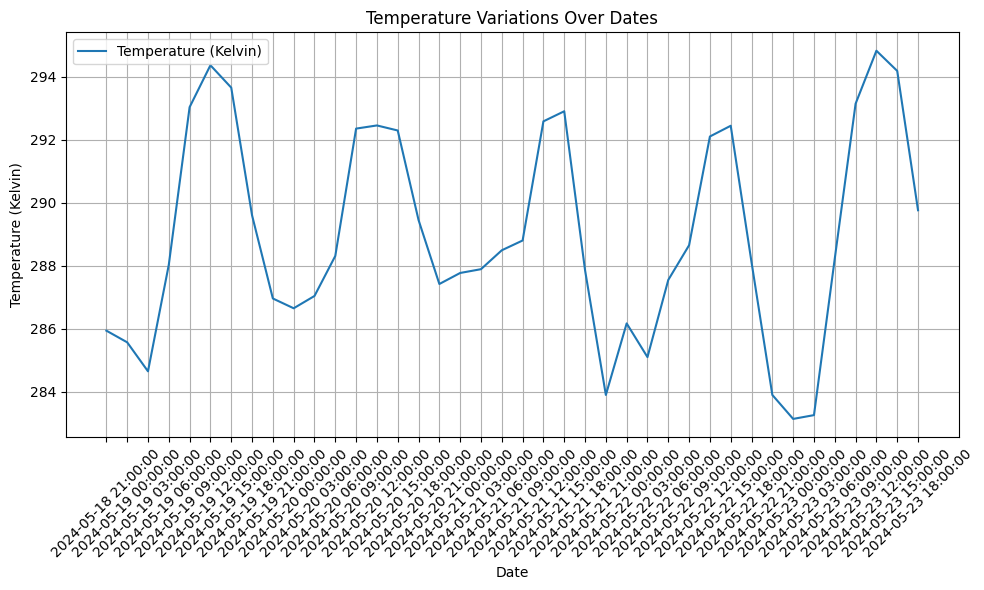

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6)) 
plt.plot(df['Date'], df["Temperature (Kelvin)"], label="Temperature (Kelvin)", linestyle='-') 
plt.xlabel('Date')
plt.ylabel('Temperature (Kelvin)')
plt.title('Temperature Variations Over Dates')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

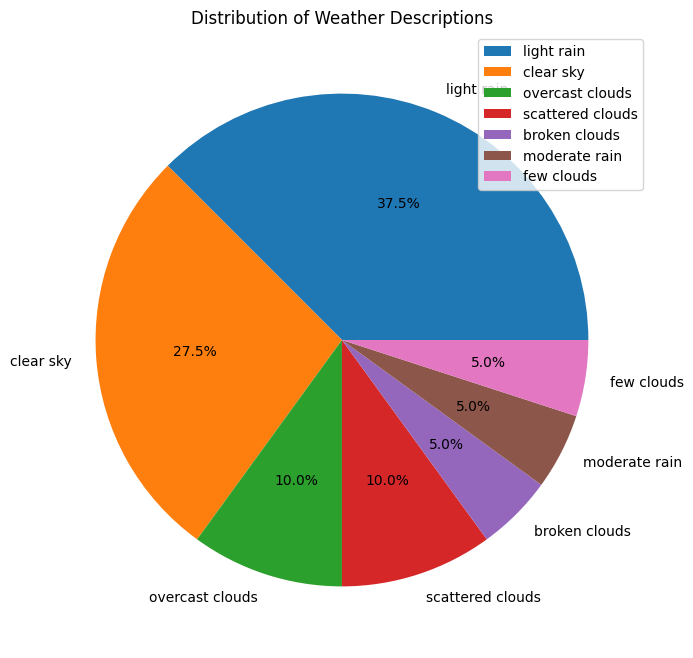

In [34]:
import matplotlib.pyplot as plt
description_counts = df['Description'].value_counts().sort_values(ascending=False)
descriptions = description_counts.index.to_numpy() 
counts = description_counts.to_numpy()
plt.figure(figsize=(8, 8)) 
plt.pie(counts, labels=descriptions, autopct="%1.1f%%")
plt.title('Distribution of Weather Descriptions')
plt.legend(descriptions, loc="best") 
plt.show()
